<a href="https://colab.research.google.com/github/Hedrios/Analise__de_Credito_com_SQL_e_Athena/blob/main/an_lise_de_cr_dito_com_sql_e_athena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Crédito com SQL e Athena**

# **1. Contexto**

Este projeto tem como objetivo analisar uma base de dados de clientes de crédito bancário, utilizando SQL para extração de informações e Python para visualizações e análises. A análise busca fornecer insights sobre o perfil dos clientes, ajudando a empresa a entender melhor seu público e a personalizar suas estratégias de marketing.

# **2. Pacotes e Bibliotecas**

As bibliotecas utilizadas para manipulação de dados e criação de gráficos são:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# **3. Manipulaçao de dados**

## **3.1 Carregando o arquivo CSV**

Primeiro, o arquivo CSV foi carregado e algumas colunas foram convertidas para o formato numérico apropriado para facilitar as análises. Isso foi feito da seguinte maneira:

In [ ]:
# Carregando o arquivo CSV
file_path = '/content/credito.csv.original.csv'
df = pd.read_csv(file_path)

# Exibir as primeiras linhas para garantir que o arquivo foi carregado corretamente
df.head()


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


## **3.2. Transformando o Limite de Crédito e Valor das Transações**

Transformamos as colunas numéricas limite_credito e valor_transacoes_12m de strings formatadas para float, conforme o código original abaixo:

In [ ]:
# Definir a função para conversão de valores
def converter_para_float(serie):
    """Converte strings de números com vírgula para float."""
    # Verifica se há vírgulas antes de aplicar a conversão
    if serie.str.contains(',').any():
        return serie.str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
    else:
        return serie.astype(float)

# Aplicar a transformação nas colunas 'limite_credito' e 'valor_transacoes_12m'
df['limite_credito'] = converter_para_float(df['limite_credito'])
df['valor_transacoes_12m'] = converter_para_float(df['valor_transacoes_12m'])

# Verificar as mudanças aplicadas nas colunas transformadas
df[['limite_credito', 'valor_transacoes_12m']].head()


,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
3,3313.03,1171.56
4,4716.22,816.08


## **3.3. Removendo colunas desnecessárias**

Para simplificar o DataFrame, algumas colunas irrelevantes foram removidas:

In [ ]:
# Definir colunas para remoção
colunas_para_remover = ['default', 'id', 'qtd_transacoes_12m']

# Remover as colunas desnecessárias
df.drop(columns=[col for col in colunas_para_remover if col in df.columns], inplace=True)


### **3.3.1 Limitando o DataFrame às primeiras 2564 linhas**

As linha foram removidas por questoes de quantidados de vai ser transmitido para o amazon AWS

In [ ]:
# Limitar o DataFrame às primeiras 2564 linhas
df_limited = df.head(2564)


## **3.4. Salvando o DataFrame modificado em um novo arquivo CSV**

Salvando o arquivo em CSV para importa para o amazon AWS - S3

In [ ]:
# Salvar o DataFrame modificado como CSV
file_path_output = 'credito_modificado.csv'
df_limited.to_csv(file_path_output, index=False)

# Conferir o local do arquivo salvo
file_path_output

'credito_modificado.csv'

# **4. Amazon AWS**

Este processo de análise dos dados utiliza SQL para consultas na Amazon Athena e gera gráficos com Python. A seguir, organizamos as consultas realizadas, os resultados extraídos e suas visualizações. O objetivo é extrair insights significativos que possam guiar as decisões da empresa.

## **4.1  Estrutura da análise**

Para realizer a parte da consulta de dados foi utilizdo o amazon AWS, jutamente com o S3 e Athena

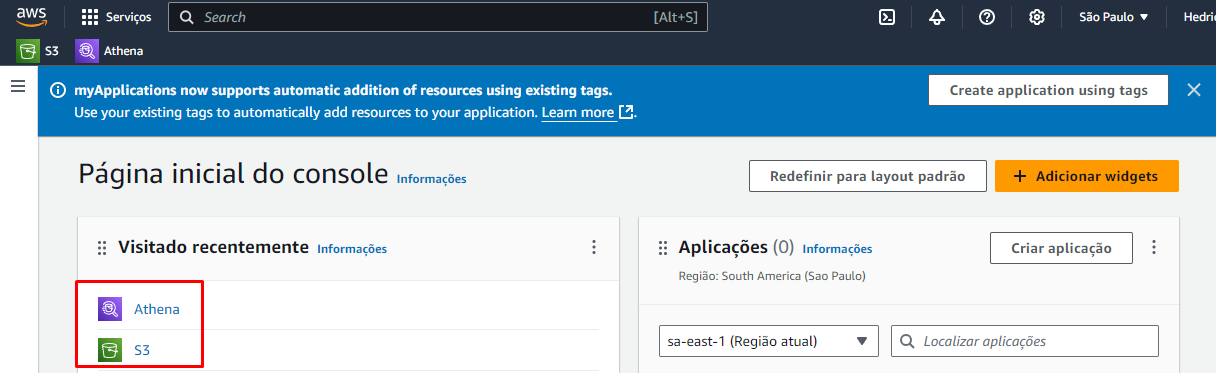

O passo a seguir foi cria um bucket para armazenar o arquivo **CSV**

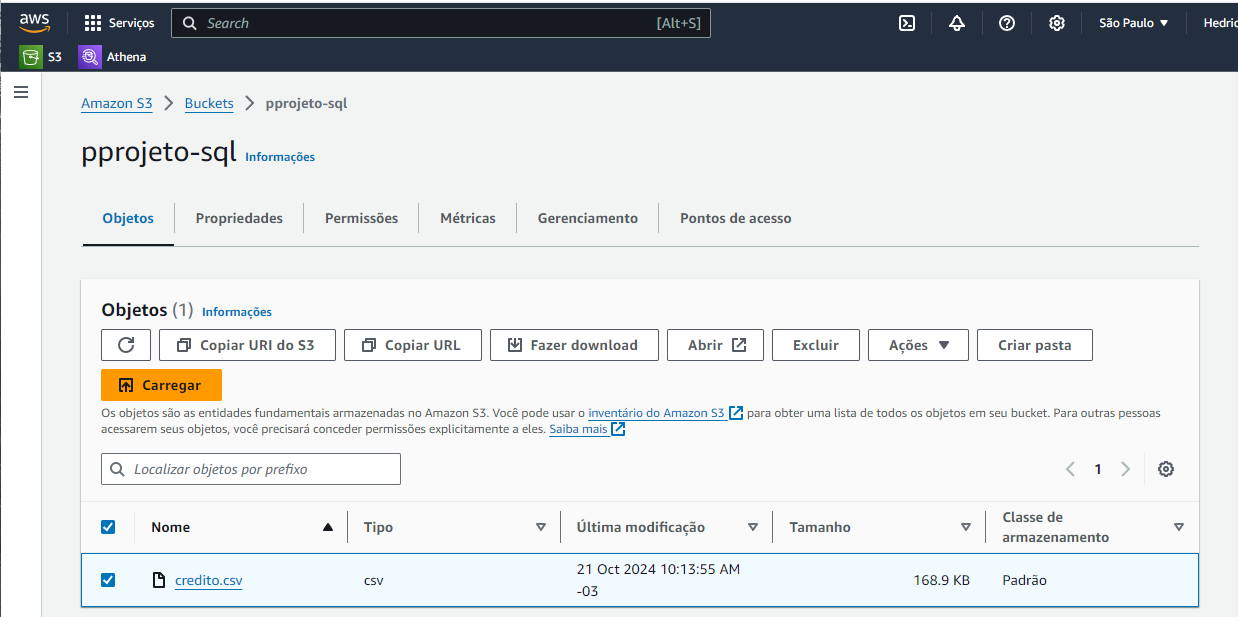

## **4.2 Athena**

No Athena, foi criada uma tabela chamada cliente, que contém informações detalhadas sobre os clientes de um banco. A tabela possui as seguintes colunas:

* idade: Idade do cliente

* sexo: Sexo do cliente (F ou M)

* dependentes: Número de dependentes do cliente

* escolaridade: Nível de escolaridade do cliente

* salario_anual: Faixa salarial do cliente

* estado_civil: Estado civil do cliente

* tipo_cartao: Tipo de cartão que o cliente possui

* qtd_produtos: Quantidade de produtos comprados nos últimos 12 meses

* iteracoes_12m: Quantidade de interações/transações nos últimos 12 meses

* meses_inativo_12m: Quantidade de meses em que o cliente ficou inativo nos últimos 12 meses

* limite_credito: Limite de crédito do cliente

* valor_transacoes_12m: Valor total das transações realizadas nos últimos 12 meses

* qtd_transacoes_12m: Quantidade de transações realizadas nos últimos 12 meses

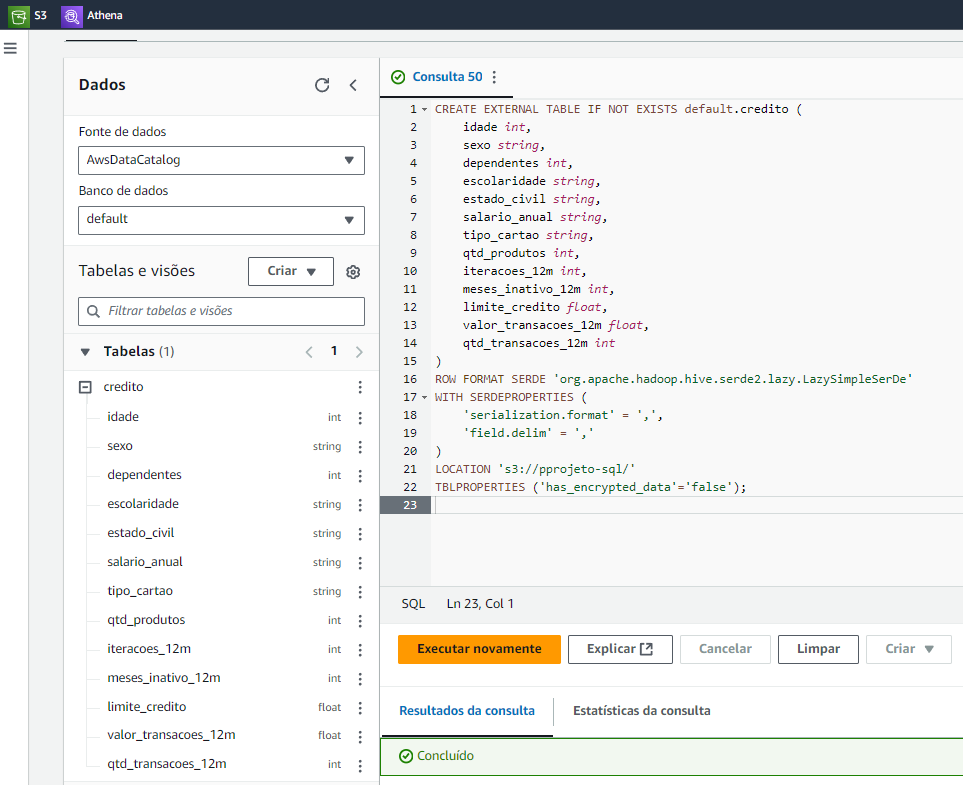

### **4.2.1 Quantidade de Informações**

**Consulta SQL:**

SELECT count(*) FROM credito;


Esse resultado indica que o dataset contém 2564 registros, que representam clientes de uma instituição financeira.

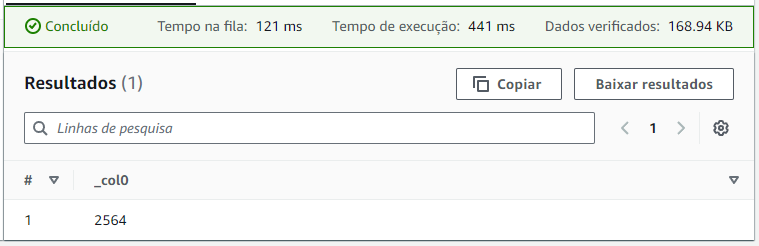

### **4.2.2 Exibição dos Dados**

**Consulta SQL:**

SELECT * FROM credito LIMIT 10;


Essa consulta lista as primeiras 10 linhas do dataset, permitindo visualizar a estrutura e os dados presentes em cada coluna.

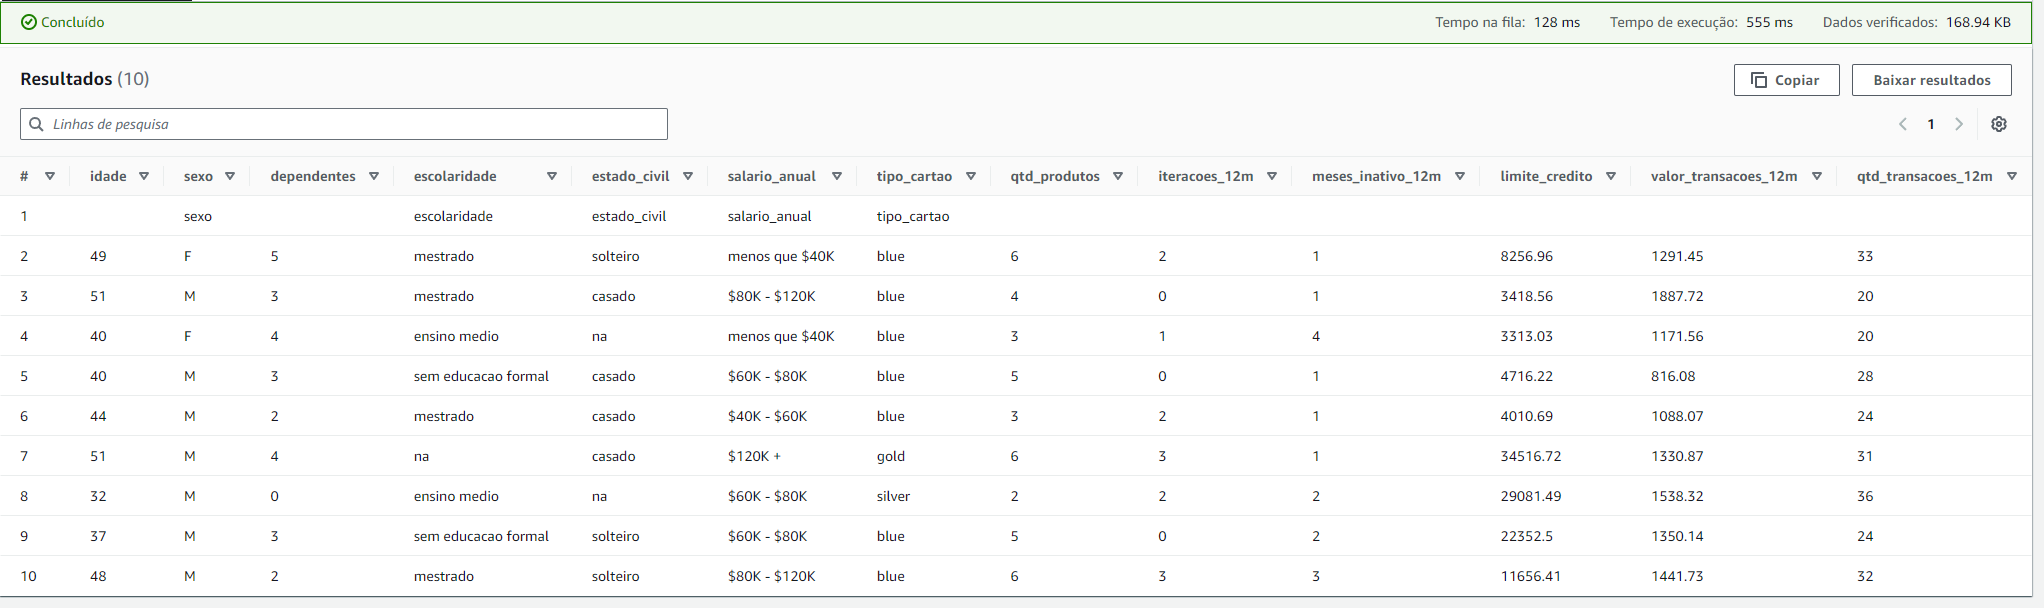

### **4.2.3 Tipos de Dados no Dataset**

**Consulta SQL:**

DESCRIBE credito;


Essa consulta fornece uma visão geral dos tipos de dados em cada coluna do dataset. A partir disso, podemos entender quais colunas são numéricas, categóricas, etc., o que é crucial para decidir como tratá-las nas análises posteriores.

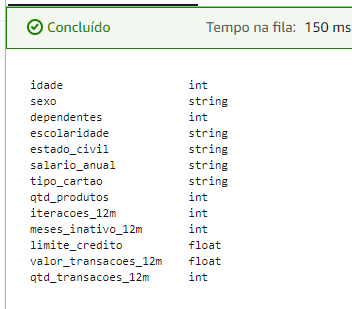

### **4.2.4 Tipos de Escolaridade**

**Consulta SQL:**

SELECT DISTINCT escolaridade FROM credito;


Essa consulta retorna os diferentes níveis de escolaridade presentes no dataset. Isso é útil para analisar se há correlação entre a escolaridade e outros fatores, como limite de crédito ou tipo de cartão.

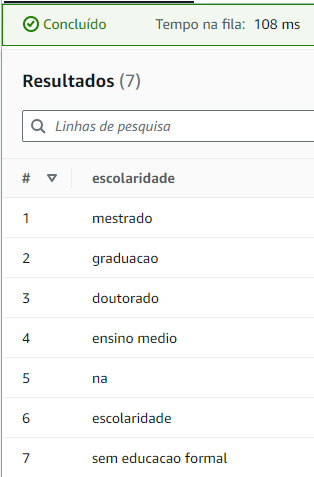

### **4.2.5 Tipos de Estado Civil**

**Consulta SQL:**

SELECT DISTINCT estado_civil FROM credito;


Esta consulta identifica as diferentes categorias de estado civil no dataset, ajudando a explorar se esse fator afeta outros aspectos, como faixa salarial ou uso de crédito.

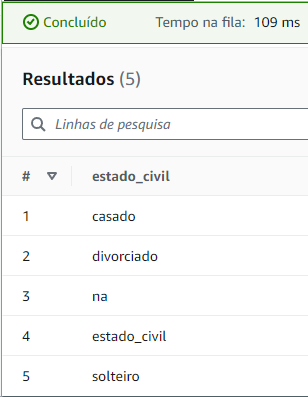

### **4.2.6 Tipos de Faixas Salariais**

**Consulta SQL:**

SELECT DISTINCT salario_anual FROM credito;


Os salários no dataset são categorizados em faixas salariais, o que é relevante para entender a distribuição de renda entre os clientes. Além disso, é possível identificar possíveis correlações entre salário e crédito concedido.

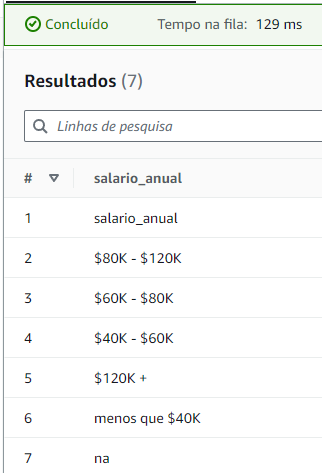

### **4.2.7 Tipos de Cartões**

**Consulta SQL:**

SELECT DISTINCT tipo_cartao FROM credito;


Esta consulta retorna os diferentes tipos de cartão que os clientes possuem, o que pode fornecer insights sobre a segmentação de produtos financeiros.

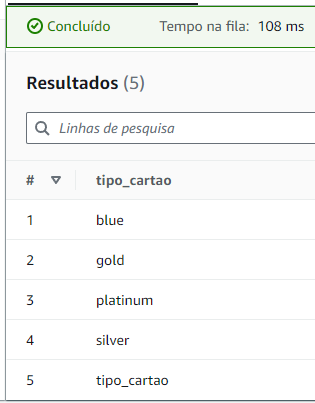

## **4.3 Análise de Dados**

Agora, aplicaremos o Storytelling with Data para reorganizar as análises feitas e apresentar insights de maneira mais clara e orientada à ação, enquanto mantemos a integridade do processo de análise que você realizou via SQL.

### **4.3.1 Distribuição de Clientes por Faixa Salarial**

**Consulta SQL:**

SELECT count(*), salario_anual FROM credito GROUP BY salario_anual;


Resultado da consulta:

Menos de $40K: 1295 clientes

$40K - $60K: 678 clientes

$60K - $80K: 390 clientes

$80K - $120K: 211 clientes

Sem informação: 235 clientes

**Visualização:**

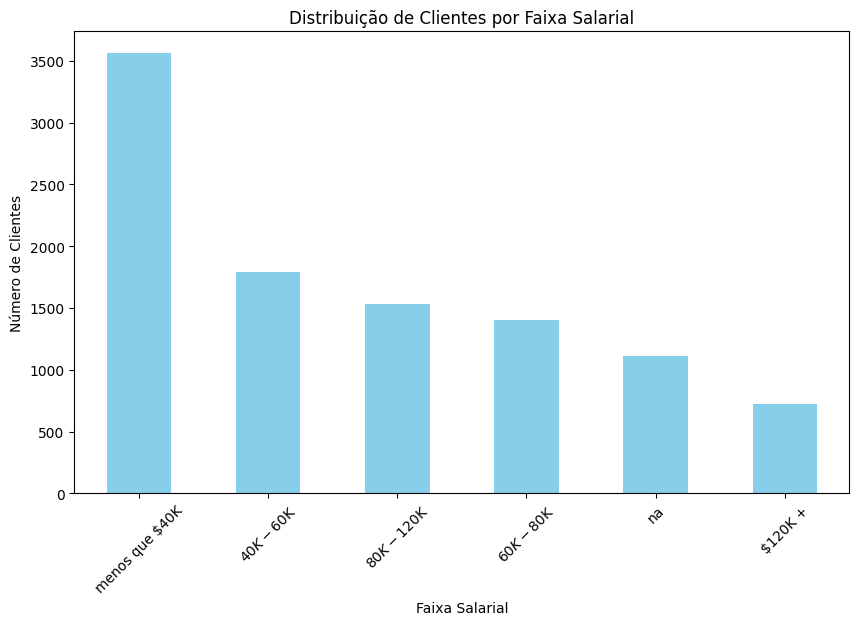

In [ ]:
# Gráfico de barras para a distribuição de clientes por faixa salarial
salario = df['salario_anual'].value_counts()

plt.figure(figsize=(10, 6))
salario.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Clientes por Faixa Salarial')
plt.ylabel('Número de Clientes')
plt.xlabel('Faixa Salarial')
plt.xticks(rotation=45)
plt.show()


**Insight:** A maioria dos clientes (50,5%) está na faixa salarial abaixo de 40K, o que indica que uma grande parte da base de clientes pode se beneficiar de produtos financeiros mais acessíveis e voltados para o público de baixa renda. Além disso, apenas uma pequena parcela ganha mais de $80K, sugerindo que os produtos premium devem ser direcionados para um nicho específico.

### **4.3.2 Proporção de Clientes por Gênero**

**Consulta SQL:**

SELECT count(*), sexo FROM credito GROUP BY sexo;


Resultado da consulta:

* Masculino: 1563 clientes
* Feminino: 1001 clientes

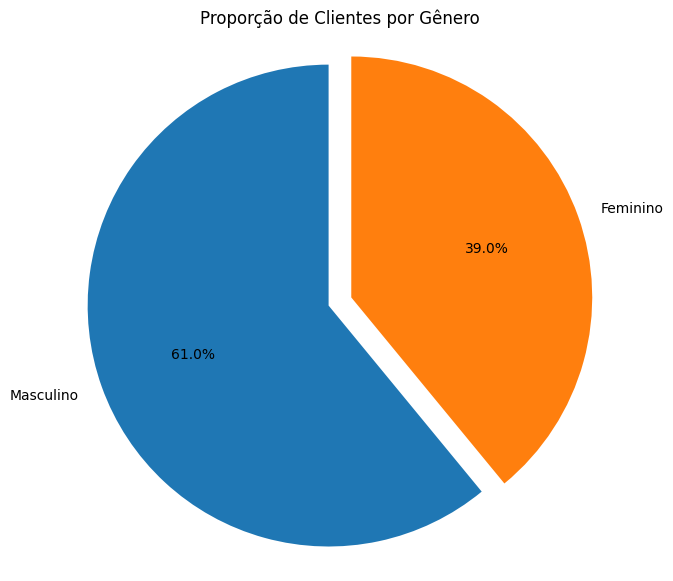

In [ ]:
import matplotlib.pyplot as plt

# Dados corretos obtidos da consulta SQL
dados_sexo = {'Masculino': 1563, 'Feminino': 1001}

# Criando o gráfico de pizza com os dados exatos
labels = dados_sexo.keys()
sizes = dados_sexo.values()
explode = (0.1, 0)  # Destacar a fatia maior

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio garante que o gráfico seja um círculo
plt.title('Proporção de Clientes por Gênero')
plt.show()


Insight: Distribuição de Gênero: A consulta SQL revelou que 60,9% dos clientes são homens, enquanto 39,1% são mulheres. Isso significa que há uma predominância masculina na base de clientes, o que pode sugerir que, historicamente, a instituição financeira atraiu mais homens.



### **4.3.3 Limites de Crédito por Gênero e Escolaridade**

**Consulta SQL:**

SELECT max(limite_credito), escolaridade, tipo_cartao, sexo FROM credito WHERE escolaridade != 'na' AND tipo_cartao != 'na' GROUP BY escolaridade, tipo_cartao, sexo ORDER BY limite_credito DESC;


Essa consulta busca entender se há uma relação entre o limite de crédito concedido, o gênero e o nível de escolaridade dos clientes.

**Visualização:**

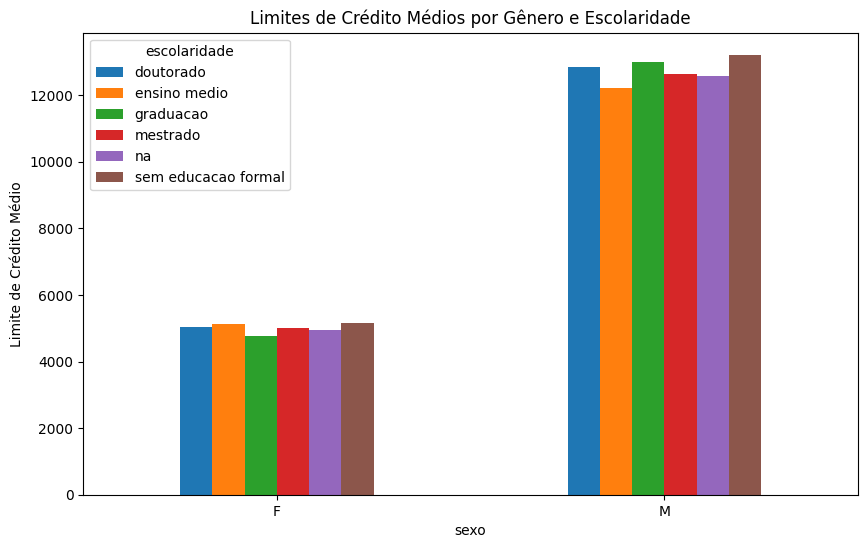

In [ ]:
# Gráfico de barras para limites de crédito médios por gênero e escolaridade
limites_credito = df.groupby(['sexo', 'escolaridade'])['limite_credito'].mean().unstack()

limites_credito.plot(kind='bar', figsize=(10, 6))
plt.title('Limites de Crédito Médios por Gênero e Escolaridade')
plt.ylabel('Limite de Crédito Médio')
plt.xticks(rotation=0)
plt.show()


**Insight:** Homens tendem a receber limites de crédito maiores em comparação às mulheres, independentemente do nível de escolaridade. Isso pode indicar um possível viés nas políticas de crédito, e a empresa pode se beneficiar de uma revisão para garantir maior equidade entre os gêneros.

### **4.3.4 Gastos Médios Anuais por Gênero**

**Consulta SQL:**

SELECT avg(valor_transacoes_12m), sexo FROM credito GROUP BY sexo;


**Resultado da consulta:**

* Homens e mulheres gastam de maneira semelhante em transações anuais.

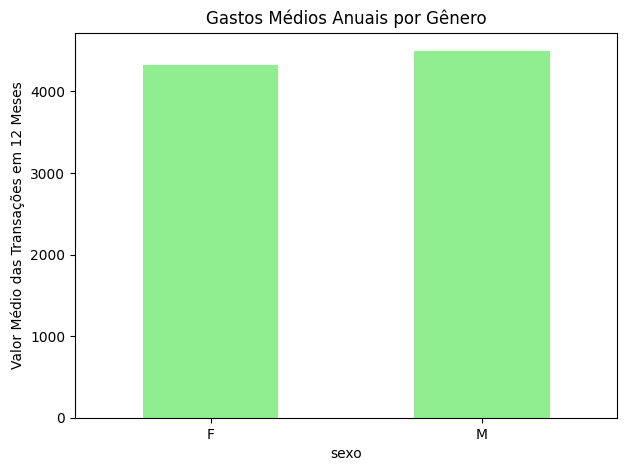

In [ ]:
# Gráfico de barras para gastos médios anuais por gênero
gastos = df.groupby('sexo')['valor_transacoes_12m'].mean()

gastos.plot(kind='bar', color='lightgreen', figsize=(7, 5))
plt.title('Gastos Médios Anuais por Gênero')
plt.ylabel('Valor Médio das Transações em 12 Meses')
plt.xticks(rotation=0)
plt.show()


**Insight:** Apesar das diferenças nos limites de crédito, homens e mulheres gastam de forma bastante similar. Isso pode indicar que as mulheres, mesmo com um limite de crédito menor, possuem um comportamento de consumo equivalente ao dos homens. Incentivar o aumento do uso de crédito entre as mulheres pode ser uma boa estratégia.

# **5. Conclusão**

A análise dos dados nos permite identificar vários pontos importantes para a estratégia da empresa:

* **Concentração de clientes com baixa renda:** A maioria dos clientes ganha menos de $40K, sugerindo um foco em produtos financeiros acessíveis para essa faixa.

* **Discrepância nos limites de crédito por gênero:** Homens recebem limites de crédito maiores do que as mulheres, mesmo quando têm níveis de escolaridade semelhantes. Esse possível viés deve ser investigado.

* **Gastos semelhantes entre gêneros:** Embora os limites de crédito sejam desiguais, homens e mulheres gastam de forma similar, o que sugere um potencial inexplorado no público feminino.

Essas informações podem guiar decisões mais estratégicas na criação de novos produtos e campanhas de marketing, visando tanto equidade quanto maximização de valor para diferentes segmentos da base de clientes.